In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [3]:
print(df['price'].describe())
print(df['number_of_reviews_ltm'].describe())

df.head(5)

count    1.585400e+04
mean     3.217704e+03
std      2.497212e+04
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64
count    15854.000000
mean         3.481519
std          8.916937
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        325.000000
Name: number_of_reviews_ltm, dtype: float64


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


**Data Pre-processing**

- Buang outliers pada data price dan minimum nights
- Mengubah tipe data room_type dan neighbourhood menjadi category
- Mengganti tipe data last review menjadi datetime
- Mengisi row null pada kolom name dan host_name dengan Unknown
- Mengisi row null pada last_review menjadi 0

In [4]:
# Buang Outlier price
listing = df.copy()
Q1 = listing['price'].quantile(0.25)
Q3 = listing['price'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

pr_clean = listing[(listing['price'] >= batas_bawah) & (listing['price'] <= batas_atas)]

removed = listing.shape[0] - pr_clean.shape[0]
print(f"{removed} data dibuang karena outlier.")

# Buang Outlier Number of Reviews in last 12 months
Q1_ltm = listing['number_of_reviews_ltm'].quantile(0.25)
Q3_ltm = listing['number_of_reviews_ltm'].quantile(0.75)
IQR_ltm = Q3_ltm - Q1_ltm
batas_bawah_ltm = Q1_ltm - 1.5 * IQR_ltm
batas_atas_ltm = Q3_ltm + 1.5 * IQR_ltm

df_clean = pr_clean[(pr_clean['number_of_reviews_ltm'] >= batas_bawah_ltm) & (pr_clean['number_of_reviews_ltm'] <= batas_atas_ltm)]

removed = pr_clean.shape[0] - df_clean.shape[0]
print(f"{removed} data dibuang karena outlier.")

df_clean.head(5)

1403 data dibuang karena outlier.
2037 data dibuang karena outlier.


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [5]:
df_clean = df_clean.drop_duplicates()
df_clean['room_type'] = df_clean['room_type'].astype('category')
df_clean['neighbourhood'] = df_clean['neighbourhood'].astype('category')
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])
df_clean['name'] = df_clean['name'].fillna('Unknown')
df_clean['host_name'] = df_clean['host_name'].fillna('Unknown')
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12414 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      12414 non-null  int64         
 1   id                              12414 non-null  int64         
 2   name                            12414 non-null  object        
 3   host_id                         12414 non-null  int64         
 4   host_name                       12414 non-null  object        
 5   neighbourhood                   12414 non-null  category      
 6   latitude                        12414 non-null  float64       
 7   longitude                       12414 non-null  float64       
 8   room_type                       12414 non-null  category      
 9   price                           12414 non-null  int64         
 10  minimum_nights                  12414 non-null  int64         
 11  number_

**Analisis**

- Problems: Jumlah listing yang ada di Neighbourhood, room type di tiap neighbourhood, dan harga setiap listing
- Goals: Membuka airbnb yang tepat sasaran di Neighbourhood pilihan

**Melihat Neighbourhood dengan jumlah review 12 bulan terakhir terbanyak**

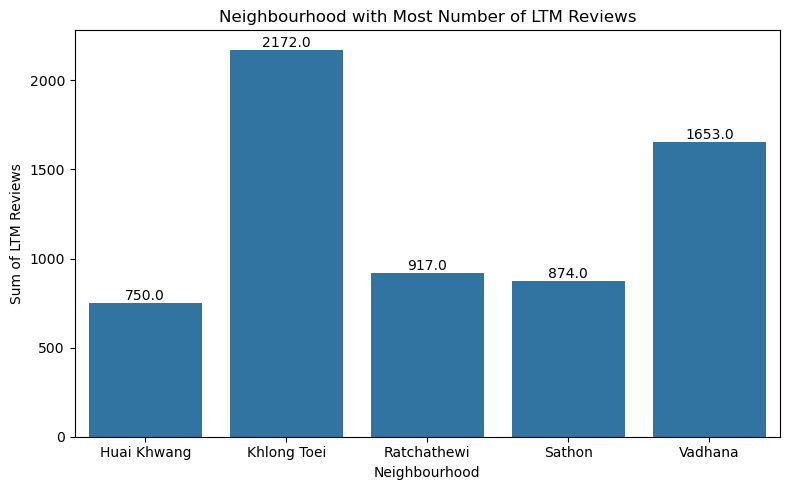

In [16]:
top5_ne = df_clean.groupby('neighbourhood', observed=True)['number_of_reviews_ltm'].sum(
).sort_values(ascending=False).head(5).reset_index(name='jml_reviews_ltm').copy()
top5_ne['neighbourhood'] = top5_ne['neighbourhood'].cat.remove_unused_categories()

plt.figure(figsize=(8,5))
vis1 = sns.barplot(x='neighbourhood', y='jml_reviews_ltm', data=top5_ne)  
plt.title('Neighbourhood with Most Number of LTM Reviews')
plt.xlabel('Neighbourhood')
for i in vis1.patches:
    vis1.annotate(format(i.get_height(), '.1f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='bottom')
plt.ylabel('Sum of LTM Reviews')  
plt.tight_layout()
plt.savefig('vis1.png', dpi=300, bbox_inches='tight')
plt.show()

Review 12 bulan terakhir menunjukkan recent activity dibandingkan number of reviews atau jumlah review yang menghitung popularitas masa lampau.

**Melihat Distribusi Harga Listings di Neighbourhood**

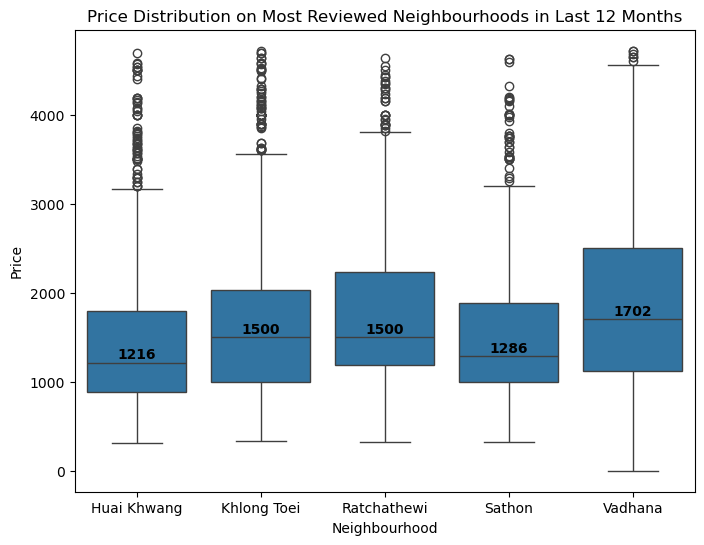

In [19]:
# Visualisasi Harga dengan boxplot
top_neigh = ['Khlong Toei', 'Vadhana', 'Ratchathewi', 'Sathon', 'Huai Khwang']
df_top5 = df_clean[df_clean['neighbourhood'].isin(top_neigh)].copy()
df_top5['neighbourhood'] = df_top5['neighbourhood'].cat.remove_unused_categories()

median_pr = df_top5.groupby('neighbourhood', observed=True)['price'].median()

plt.figure(figsize=(8, 6))
vis2 = sns.boxplot(x='neighbourhood', y='price', data=df_top5)
plt.title('Price Distribution on Most Reviewed Neighbourhoods in Last 12 Months')
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
for i, median in enumerate(median_pr):
    vis2.text(i, median + 10,  
            f'{median:.0f}', 
            ha='center', va='bottom', fontweight='bold', color='black')
plt.savefig('vis4.png', dpi=300, bbox_inches='tight')
plt.show()

Rentang harga di setiap neighborhood relatif rata kecuali Vadhana yang menawarkan harga di atas keempat neighborhood lainnya.

**Number of Reviews paling banyak di tipe kamar apa?**

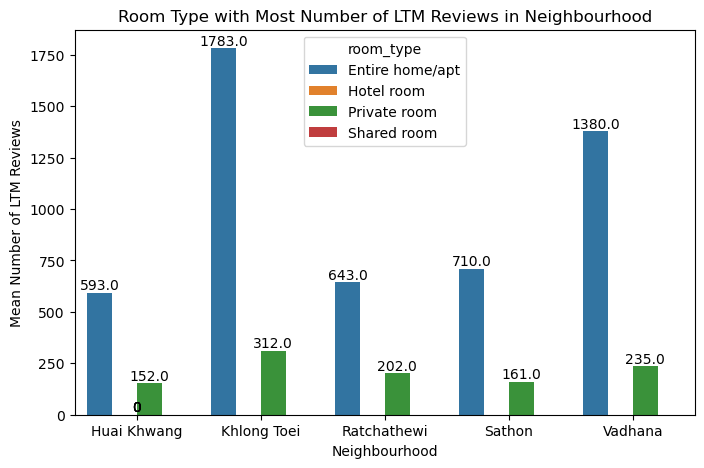

In [17]:
top5_nreview = df_top5.groupby(['neighbourhood','room_type'], observed=True)['number_of_reviews_ltm'].sum().reset_index()
top5_rt_nr = top5_nreview.sort_values('number_of_reviews_ltm', ascending=False).groupby('neighbourhood', observed=True).head(2)

plt.figure(figsize=(8,5))
vis3 = sns.barplot(x='neighbourhood', y='number_of_reviews_ltm', hue='room_type', data=top5_rt_nr)
plt.title('Room Type with Most Number of LTM Reviews in Neighbourhood')
plt.xlabel('Neighbourhood')
for i in vis3.patches:
    vis3.annotate(format(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='bottom')
plt.ylabel('Mean Number of LTM Reviews')
plt.savefig('vis2.png', dpi=300, bbox_inches='tight')
plt.show()

Number of LTM reviews mengindikasikan aktivitas terkini dan chart ini menggambarkan bahwa aktivitas terkini paling banyak ditemukan pada tipe ruangan Entire home/Apt.

**Melihat Tipe Ruangan Apa yang paling banyak Listingnya di Neighbourhood**

Untuk rising insight, kita cari profil kompetitor pada neighbourhood yang kita pilih.

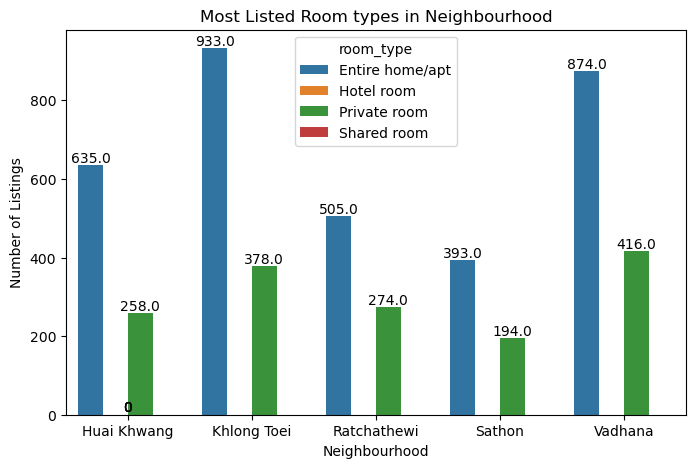

In [18]:
top5_rt = df_top5.groupby('neighbourhood',observed=True)['room_type'].value_counts().reset_index(name='jml_listing')
top5_rt_ne = top5_rt.sort_values('jml_listing', ascending=False).groupby('neighbourhood',observed=True).head(2)

plt.figure(figsize=(8,5))
vis4 = sns.barplot(x='neighbourhood', y='jml_listing', hue='room_type', data=top5_rt_ne)
plt.title('Most Listed Room types in Neighbourhood')
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood')
for i in vis4.patches:
    vis4.annotate(format(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='bottom')
plt.savefig('vis3.png', dpi=300, bbox_inches='tight')
plt.show()

Meski demand (aktivitas) tinggi ditunjukkan oleh tipe ruang Entire Home/Apt, kompetisi pasar pada ruang tipe Entire Home/Apt juga tinggi.

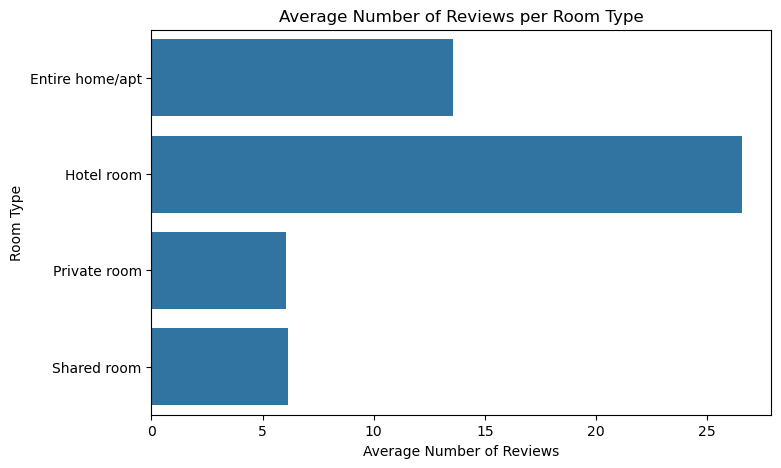

In [22]:
mean_reviews_per_listing = df_top5.groupby('room_type', observed=True)['number_of_reviews'].mean().reset_index(name='mean_n_of_reviews')

plt.figure(figsize=(8,5))
vis5 = sns.barplot(x='mean_n_of_reviews', y='room_type', data=mean_reviews_per_listing)
plt.title('Average Number of Reviews per Room Type')
plt.ylabel('Room Type')
plt.xlabel('Average Number of Reviews')
plt.savefig('vis5.png', dpi=300, bbox_inches='tight')
plt.show()

Jika melihat jumlah seluruh review, terlihat bahwa review hotel mendominasi, disusul dengan Entire Home/Apt. Artinya, bisa jadi terjadi market shift dari hotel room yang awalnya banyak namun akhirnya menurun aktivitasnya, sedangkan Entire Home/Apt mendominasi dalam aktivitas terkini. Private dan Shared Room rata lebih rendah dibanding tipe ruang lainnya.

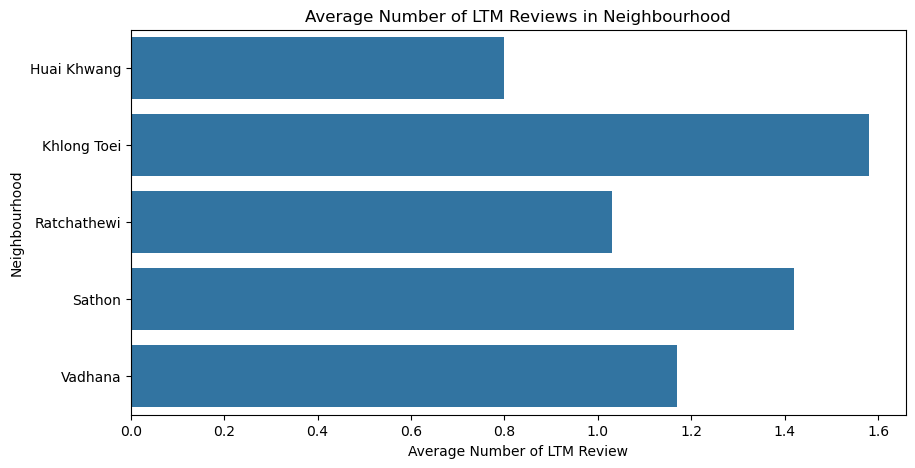

In [21]:
most_listing = df_top5.groupby('neighbourhood',observed=True)['number_of_reviews_ltm'].mean().round(2).reset_index(name='avg_listing')
most_listing['neighbourhood'] = most_listing['neighbourhood'].cat.remove_unused_categories()

plt.figure(figsize=(10,5))
sns.barplot(x='avg_listing', y='neighbourhood', data=most_listing)
plt.title('Average Number of LTM Reviews in Neighbourhood')
plt.xlabel('Average Number of LTM Review')
plt.ylabel('Neighbourhood')
plt.savefig('vis6.png', dpi=300, bbox_inches='tight')
plt.show()

Meski kompetisi tinggi, terlihat bahwa rasio review per listing di Khlong Toei, Ratchatewi, Sathon, dan Vadhana melebihi 1,0. Artinya demand (review client) berimbang dan/atau melebihi supply (AirBnB yang tersedia) di neighbourhood tersebut. Hal ini menandakan bahwa pasar masih sehat dan mampu bersaing memenuhi demand tanpa terjadi oversaturation atau kelebihan supply.